In [299]:
%pylab inline

from sklearn.datasets import make_sparse_spd_matrix

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [ ]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import urllib, zipfile, StringIO

In [328]:
def generate(n_dim_obs=3, n_dim_lat=2, epsilon=1e-3, T=10):
    theta_tot = make_sparse_spd_matrix(n_dim_lat + n_dim_obs, alpha=.3, norm_diag=1)

    theta_tot[n_dim_lat:, n_dim_lat:] = make_sparse_spd_matrix(
        n_dim_obs, alpha=.5, norm_diag=1)

#     theta_tot = theta_tot.dot(theta_tot.T)
#     assert is_pos_def(theta_tot)
    assert np.linalg.matrix_rank(theta_tot[:n_dim_lat, :n_dim_lat]) == n_dim_lat

    thetas = [theta_tot]

    for i in range(T):
        theta_tot_i = make_sparse_spd_matrix(
            n_dim_lat + n_dim_obs, alpha=.95, norm_diag=1) 
        theta_tot_i.flat[::n_dim_lat + n_dim_obs + 1] = 1e-16
        theta_tot_i /= np.linalg.norm(theta_tot_i, 'fro')
        theta_tot_i *= epsilon

        theta = thetas[-1].copy()
        theta += theta_tot_i
        threshold = np.linalg.norm(theta_tot, 'fro') / (n_dim_lat + n_dim_obs)
        theta[np.logical_and(theta < threshold, -threshold < theta)] = 0
        thetas.append(theta)
    return thetas

In [329]:
thetas = generate(epsilon=.5)

In [330]:
thetas

[array([[ 1.        , -0.54124028,  0.13691014,  0.29301705, -0.31822893],
        [-0.54124028,  1.        , -0.2529563 , -0.54138071,  0.        ],
        [ 0.13691014, -0.2529563 ,  1.        , -0.35646292,  0.        ],
        [ 0.29301705, -0.54138071, -0.35646292,  1.        ,  0.        ],
        [-0.31822893,  0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 1.2236068 , -0.54124028,  0.        ,  0.        ,  0.        ],
        [-0.54124028,  1.2236068 ,  0.        , -0.54138071,  0.        ],
        [ 0.        ,  0.        ,  1.2236068 ,  0.        ,  0.        ],
        [ 0.        , -0.54138071,  0.        ,  1.2236068 ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.2236068 ]]),
 array([[ 1.4472136 , -0.54124028,  0.        ,  0.        ,  0.        ],
        [-0.54124028,  1.4472136 ,  0.        , -0.54138071,  0.        ],
        [ 0.        ,  0.        ,  1.4472136 ,  0.        ,  0.        ],
        [ 0.        ,

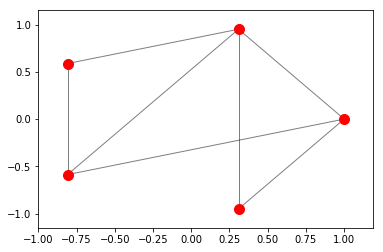

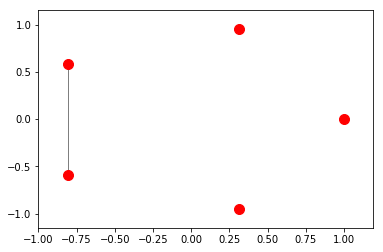

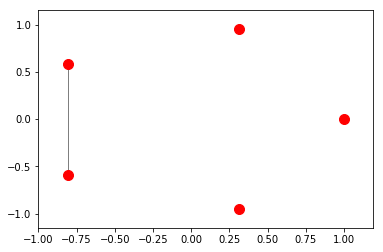

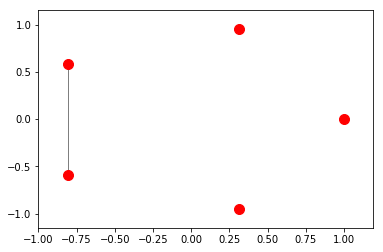

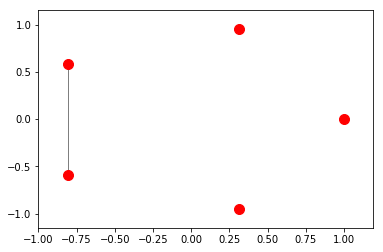

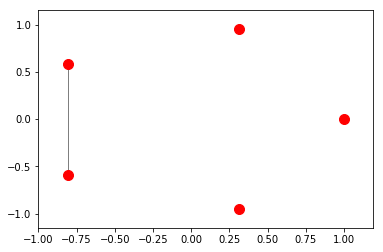

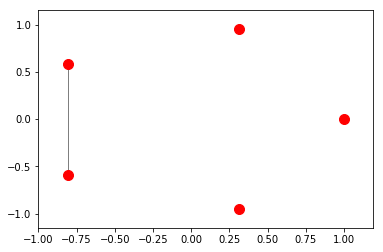

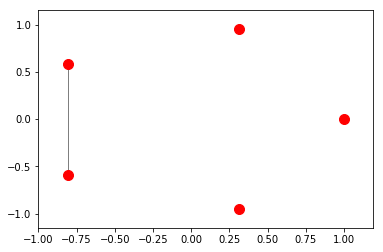

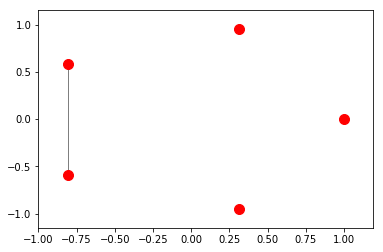

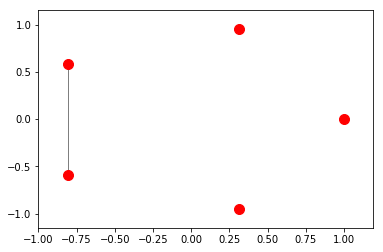

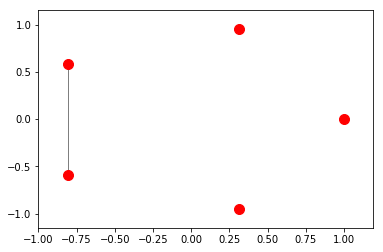

In [319]:
for theta in thetas:
#     plt.imshow(theta)
#     plt.colorbar()
#     plt.show()
    G = nx.from_numpy_matrix(theta)
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(G, pos, G.nodes,
                        node_size=100)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [282]:
pos

{0: array([-0.6667087,  0.7813821]),
 1: array([ 1.        ,  0.31315739]),
 2: array([ 0.11040366, -0.75266701]),
 3: array([ 0.35707619, -0.90367449]),
 4: array([-0.80077115,  0.56180202])}

In [240]:
import sys
def generate_ma_xue_zou(n_dim_obs=12, n_dim_lat=2, epsilon=1e-3):
    theta = make_sparse_spd_matrix(n_dim_lat + n_dim_obs, alpha=.9, norm_diag=1)
    theta_flat = theta.flatten()
    idx = (theta_flat != 0)
    
    proba = np.random.randn(*theta_flat.shape)
    proba = np.where(proba > 0, 1, -1)
    
    theta_flat[idx] = proba[idx]

    U = theta_flat.reshape(theta.shape)
    UTU = U.dot(U.T)
#     UTU.flat[::theta.shape[0]+1] = 1
    try:
        K = np.linalg.inv(UTU)
        assert is_pos_def(K)
    except:
        sys.stdout.write("-")


In [241]:
for i in range(500):
    generate_ma_xue_zou()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [242]:
len("---------------------------------------------------------------------------------------------------------------------------------------------")

141